#Classify Customers : client’s cases in terms of whether he will subscribe to a deposit or not based on his /her information

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline 

In [2]:
import seaborn as sns
sns.set(color_codes = True)

# Reading Data and get some information about data

In [3]:
#read Data
dataset = pd.read_csv('bank.csv', sep = ';')

In [4]:
dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [5]:
#shape of data and columns name
print("Shape of the data:",dataset.shape)
print("Columns Names are:\n",dataset.columns)

Shape of the data: (4521, 17)
Columns Names are:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


# Our data include 4521 entries and  17 columns

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


#show columns that have numeric values

In [7]:
numeric_data = dataset.select_dtypes(include = np.number)
numeric_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [8]:
numeric_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

#show columns that have categorical data

In [9]:
categorical_data = dataset.select_dtypes(exclude = np.number)
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


#check if our data have missing vaues

In [10]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#Analysis Data 

* As count plot shows that the may month has the most value

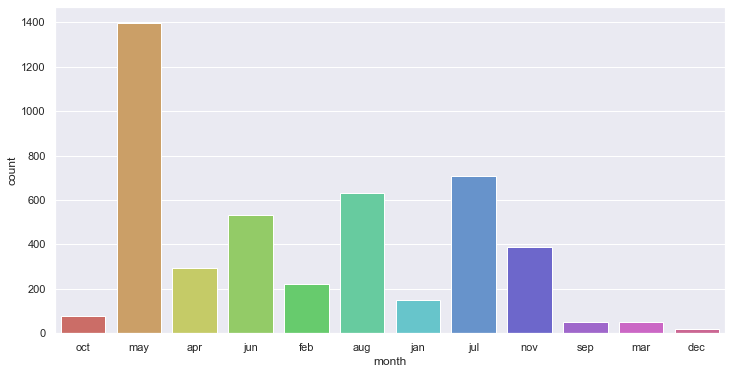

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x= dataset['month'], data= dataset, palette= 'hls')
plt.show()

*  As line plot shows how balance spread over day

<AxesSubplot:xlabel='day', ylabel='balance'>

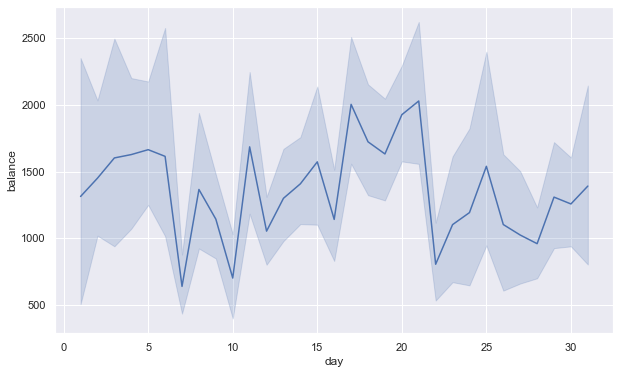

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

sns.lineplot(x=dataset['day'], y=dataset['balance'])

*  As count plot shows that the secondary has the most value

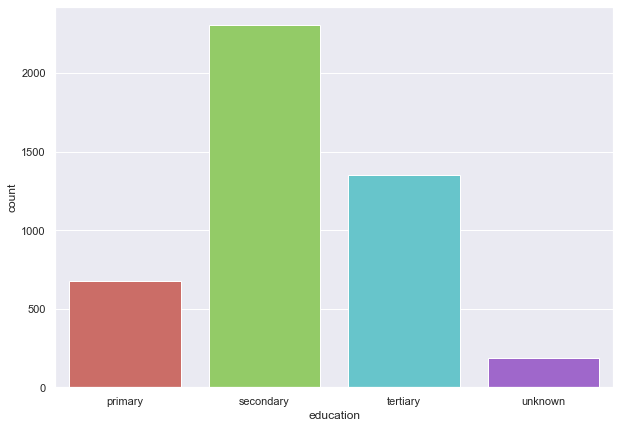

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x= dataset['education'], data= dataset, palette= 'hls')
plt.show()

*  As count plot shows that the managment job has the most count

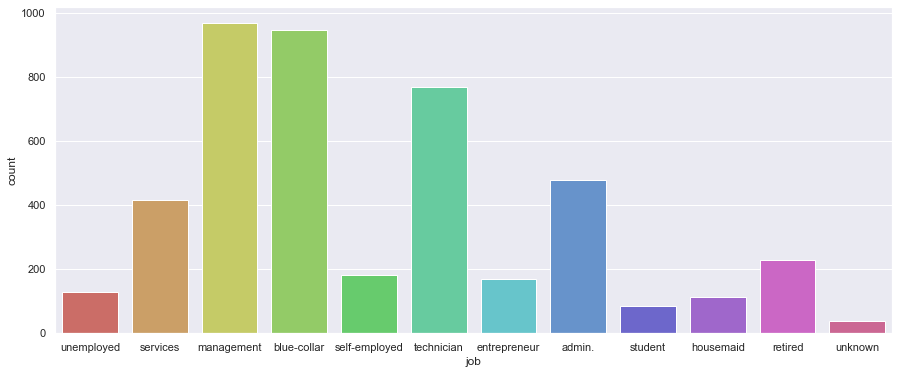

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x= dataset['job'], data= dataset, palette= 'hls')
plt.show()

*  As count plot shows that the married (marital) has the most count

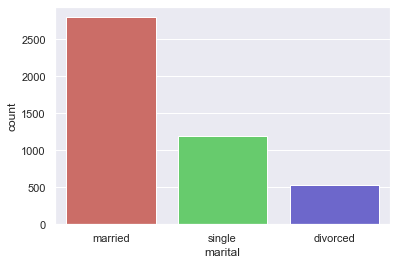

In [15]:

sns.countplot(x= dataset['marital'], data= dataset, palette= 'hls')
plt.show()

* show count for each type: 
* no     88.476001
* yes    11.523999

In [16]:
#Check Balance
class_values = (dataset['y'].value_counts()/dataset['y'].value_counts().sum())*100
class_values

no     88.476001
yes    11.523999
Name: y, dtype: float64

#Data Processing

* we apply LabelEncoder method in categorical variables to be numeric

In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cat_var=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']
for i in cat_var:
    dataset[i]=LE.fit_transform(dataset[i])
    
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


#Split data : 
* x :  all columns (independent variables)
* y :  dependent variable (yes, No)

In [18]:
X=dataset.iloc[:,0:16]
y=dataset.iloc[:,-1:]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# apply scaling method in data to make learning process more easy

In [20]:
sc=StandardScaler()
sc.fit_transform(X)

array([[-1.05626965,  1.71680374, -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-0.77258281,  0.79524562, -0.24642938, ...,  2.98904408,
         2.04173372, -2.57996071],
       [-0.58345826, -0.12631251,  1.42139579, ...,  2.89914302,
         0.27012381, -2.57996071],
       ...,
       [ 1.49691189,  1.4096177 , -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-1.24539421, -1.04787063, -0.24642938, ...,  1.71045119,
         1.45119709, -1.57183605],
       [ 0.26760226, -0.74068459,  1.42139579, ...,  2.09003345,
         3.81334363, -1.57183605]])

#split data : train , test

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [22]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4256,34,3,1,0,0,2929,0,0,0,14,1,518,2,-1,0,3
86,41,9,2,1,0,879,0,1,0,7,5,60,4,-1,0,3
4037,42,4,0,2,0,0,0,0,2,19,8,131,2,-1,0,3
1367,40,9,1,1,0,169,1,0,0,18,1,43,4,-1,0,3
1015,43,5,1,1,0,520,1,0,2,20,8,15,13,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,29,1,1,1,0,228,1,0,0,11,8,12,8,342,9,0
1099,58,3,1,0,0,5278,1,0,2,4,6,763,4,-1,0,3
2514,31,9,2,3,0,694,1,0,2,6,6,431,2,-1,0,3
3606,29,7,1,1,0,308,1,0,2,28,8,75,1,-1,0,3


In [23]:
y_train

,y
4256,1
86,0
4037,0
1367,0
1015,0
...,...
3335,0
1099,0
2514,0
3606,0


#Next Step: Build model

In [24]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [25]:
from sklearn.linear_model import LogisticRegression
Log_Modl = LogisticRegression(random_state=0).fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
predictions = Log_Modl.predict(X_test)

In [27]:
print(predictions)

[0 0 0 ... 0 0 0]


#Accuracy Score

In [28]:
# Now get predictions from the model and create a confusion matrix and a classification report.
predictions = Log_Modl.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, predictions))

[[999  11]
 [111  10]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1010
           1       0.48      0.08      0.14       121

    accuracy                           0.89      1131
   macro avg       0.69      0.54      0.54      1131
weighted avg       0.85      0.89      0.86      1131



Accuracy score is:  0.8921308576480991


#Naive Bayes


In [29]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [30]:
y_pred = gnb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
predicts = gnb.predict(X_test)

In [32]:
print(predicts)

[0 0 0 ... 0 0 0]


In [33]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predicts))
print('\n')
print(classification_report(y_test, predicts))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, predicts))

[[975  35]
 [ 94  27]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1010
           1       0.44      0.22      0.30       121

    accuracy                           0.89      1131
   macro avg       0.67      0.59      0.62      1131
weighted avg       0.86      0.89      0.87      1131



Accuracy score is:  0.8859416445623343


#Random Forest Classifier

In [34]:
 from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators=10)


In [36]:
clf = clf.fit(X_train, y_train)

<ipython-input-36-7868ccb6b856>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)


In [37]:
pre = clf.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pre))
print('\n')
print(classification_report(y_test, pre))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pre))

[[976  34]
 [ 97  24]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1010
           1       0.41      0.20      0.27       121

    accuracy                           0.88      1131
   macro avg       0.66      0.58      0.60      1131
weighted avg       0.86      0.88      0.87      1131



Accuracy score is:  0.8841732979664014
